# HDDA. Home Assignment 1

In this homework you need to implement your version of the PCA in case you chose the base level, and SparcePCA in case you are a champion. 

- The task consists of three stages. At the first stage, you are invited to demonstrate PCA on a classic dataset. You need to work with and explain why there is a loss of information.

- In the next step, you need to implement an algorithm that matches the level you selected (basic = PCA, champion = SparcePCA), and to test your implementation on a simple synthetic example in which the main components are well identified.

- The third stage is a creative task. You are offered a dataset from the kaggle contest. You are required to solve this task, provide your decisions with comments on why one or another step was taken. After the deadline, we will review your decisions in a discussion format.

## Case 1: Recap

To begin with, we consider the demonstration case of classifying sets that are well separable. We use the function of generating multidimensional blobs from the `sklearn` module.

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples = 10000, n_features = 5, random_state = 101, centers=4,
                  cluster_std=[5.1, 4.2, 5.3, 2.4],
                  center_box=(-10.0, 10.0),
                  shuffle=True)

Draw the resulting set by using `pyplot` from `matplotlib`

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

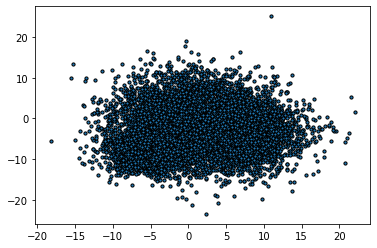

In [5]:
plt.scatter(X[:,0], X[:,1], s=10, edgecolor='k')

gloom...

Okay. Let's see the projections on the first two axes.

In [6]:
# make a color map
color_map = dict(zip([0,1,2,3], ["red", "blue", "green", "yellow"]))

{<matplotlib.collections.PathCollection at 0x247c5719c70>,
 <matplotlib.collections.PathCollection at 0x247c66f8880>}

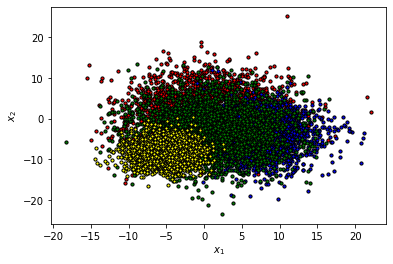

In [7]:
# draw original set by using simple for comprehension
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
{plt.scatter(X[y == k, 0], X[y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in color_map.items()}   

Nice! Now let's see what we have with clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
#Set a 4 KMeans clustering
kmeans_test = KMeans(n_clusters = 4)

In [10]:
#Compute cluster centers and predict cluster indices
X_test = kmeans_test.fit_predict(X)

In [11]:
import numpy as np
# make a color map for predicted cluster indices
kmeans_color_map = dict(zip(np.unique(kmeans_test.labels_), ["red", "blue", "green", "yellow"]))

{<matplotlib.collections.PathCollection at 0x247c6cae880>,
 <matplotlib.collections.PathCollection at 0x247c6cbc0a0>}

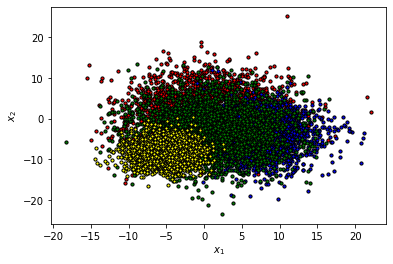

In [12]:
# draw clustered set
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
{plt.scatter(X[y == k, 0], X[y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in kmeans_color_map.items()} 

Ok! What about clustering metrics? Let's see all of them.

In [13]:
from sklearn import metrics

In [14]:
print('ARI: '+str(metrics.adjusted_rand_score(y, kmeans_test.labels_)))
print('AMI: '+str(metrics.adjusted_mutual_info_score(y, kmeans_test.labels_)))
print('Homogenity: '+str(metrics.homogeneity_score(y, kmeans_test.labels_)))
print('Completeness: '+str(metrics.completeness_score(y, kmeans_test.labels_)))
print('V-measure: '+str(metrics.v_measure_score(y, kmeans_test.labels_)))
print('Silhouette: '+str(metrics.silhouette_score(X, kmeans_test.labels_)))

ARI: 0.8244871756050167
AMI: 0.7966143759540105
Homogenity: 0.7961294036284814
Completeness: 0.7972322989538196
V-measure: 0.7966804695893384
Silhouette: 0.32688315686950803


For more info you can use [7 topic of ODS Course](https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering).

Russian version of the article [here](https://habr.com/company/ods/blog/325654/)

Now let's check how much components have influence in terms of explained variance. The [article](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#explained-variance) can help you to realize the concept of explained variance. Here is the support function below: for plotting ` explained variance/principle components` flat. 

In [15]:
# survice function for Explained variance ratio plotting
def plot_explained_variance(X):
    #Calculating Eigenvecors and eigenvalues of Covariance matrix
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)

    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

To use it properly it would be better to use [Feature Scaling](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
by using `StandardScaler` from the `sklearn` preprocessing.

In [16]:
from sklearn.preprocessing import StandardScaler

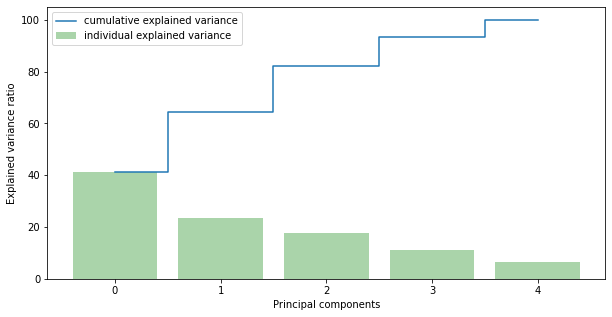

In [17]:
X_std = StandardScaler().fit_transform(X)
plot_explained_variance(X_std)

The plot above clearly shows that most of the variance can be explained by the 4 first principal components. But to see more in detail, let's look at the correlation matrix. To do this, we first wrap the data in the `DataFrame` (`pandas` module) and then use the `heatmap` from `seaborn` module.

In [18]:
import seaborn as sns
import pandas as pd

In [19]:
columns = ['feature_' + str(x) for x in np.arange(1, 7, 1)]
d = {key: values for key, values in zip(columns, X.T)}
data = pd.DataFrame(d)

<AxesSubplot:title={'center':'Pearson Correlation of Movie Features'}>

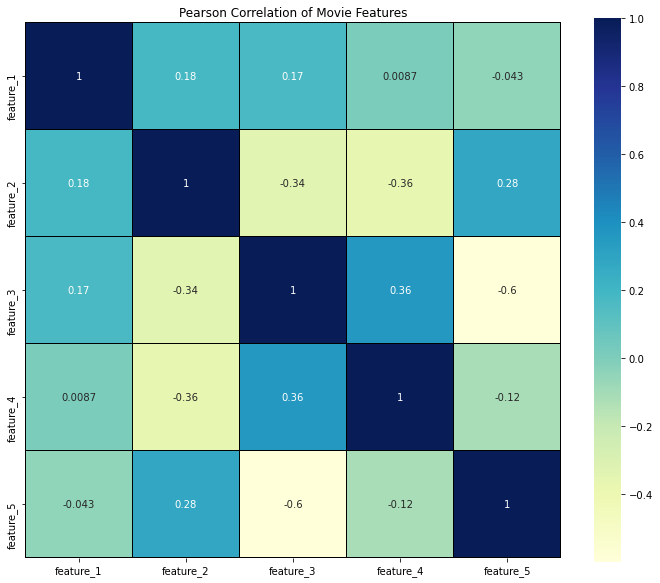

In [20]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

So, it's time to use PCA. Let's try it with 4 components and and see what happens

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X_std)

{<matplotlib.collections.PathCollection at 0x247c7e7ec10>,
 <matplotlib.collections.PathCollection at 0x247c80a5f10>}

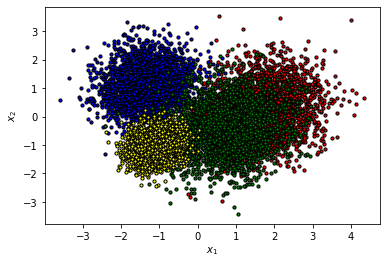

In [23]:
# draw transformed set using simple for comprehension
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
{plt.scatter(X_transformed[y == k, 0], X_transformed[y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in color_map.items()} 

In [24]:
#Set a 4 KMeans clustering
kmeans = KMeans(n_clusters = 4)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X_transformed)

print('ARI: '+str(metrics.adjusted_rand_score(y, kmeans.labels_)))
print('AMI: '+str(metrics.adjusted_mutual_info_score(y, kmeans.labels_)))
print('Homogenity: '+str(metrics.homogeneity_score(y, kmeans.labels_)))
print('Completeness: '+str(metrics.completeness_score(y, kmeans.labels_)))
print('V-measure: '+str(metrics.v_measure_score(y, kmeans.labels_)))
print('Silhouette: '+str(metrics.silhouette_score(X, kmeans.labels_)))

ARI: 0.8036525289442926
AMI: 0.7756110963307777
Homogenity: 0.774931473366617
Completeness: 0.7764380611659782
V-measure: 0.7756840357169322
Silhouette: 0.3246824733137969


It is obvious that there was a loss of information and the quality of clustering has greatly decreased. Try to explain this fact.

### Task 1: Explain why in the example above there was a loss of information

In [25]:
# YOUR ANSER HERE
"""
PCA tries to put maximum possible information (hightest variance) in the first component then 
maximum remaining information in the second and so on. 
such that organizing in principle components this way will allow us to reduce 
dimensionality without losing much information and this by discarding the 
components with low information (lowest variance).
and here the plot_explained_variance show that feature5 is the most component 
which have low information (lowest variance). therefore after choosing the n=4. the PCA
will discard the last component(feature5) and this will lead to loss in information.

correction used to analyze the relationships between variables and the correlation matix show that there is high negative 
correlation between feature_5 and feature_3 and high positive correlation between feature_5 and feature_2. But if we look at
the correlation between feature_1 and other features. the feature_5 have strong correlation compared with the feature_1
which is hightest variance.

SO, if we dropped feature_5, the accuracy of clustering will decrease. such that the functions like adjusted_rand_score 
which evaluate the performance of clustering. if we look at the numbers of these functions before and after PCA.
we will find the numbers are decreased after using PCA. Because the PCA will choose the features which have large 
variance as important features, but maybe the features which have large variance can do nothing with the prediction. 
So in some cases maybe the PCA choose useless features and drop useful features.



"""

'\nPCA tries to put maximum possible information (hightest variance) in the first component then \nmaximum remaining information in the second and so on. \nsuch that organizing in principle components this way will allow us to reduce \ndimensionality without losing much information and this by discarding the \ncomponents with low information (lowest variance).\nand here the plot_explained_variance show that feature5 is the most component \nwhich have low information (lowest variance). therefore after choosing the n=4. the PCA\nwill discard the last component(feature5) and this will lead to loss in information.\n\ncorrection used to analyze the relationships between variables and the correlation matix show that there is high negative \ncorrelation between feature_5 and feature_3 and high positive correlation between feature_5 and feature_2. But if we look at\nthe correlation between feature_1 and other features. the feature_5 have strong correlation compared with the feature_1\nwhich is

## Case 2: A Synthetic Example

A synthetic example contains 10 features, each of which is a simple linear combination of three values: $V1, V2, V3$

$$V_1 \sim N(0, 290)$$
$$V_2 \sim N (0, 300)$$
$$V_3 = −0.3 V_1 + 0.925 V_2 + \epsilon, \ \epsilon \sim N(0, 1)$$

You need to find out how much of this data set has the main components, and compare the speed of your PCA implementation (SPCA) and the implementation of the library version.

In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# The first column contains numbers, so we'll drop it away

df = pd.read_csv("./synthetic.csv").drop(['Unnamed: 0'], axis=1)

In [28]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-10.300572,-10.223979,-10.261041,-10.298542,-0.907981,-0.871749,-0.858199,-0.869117,2.260210,2.295032
std,290.351225,290.416600,290.447987,290.348275,309.676982,309.679532,309.688980,309.690409,299.690438,299.702929
min,-948.785544,-947.426298,-948.183414,-946.103105,-1050.600486,-1051.590743,-1050.689972,-1052.534237,-981.237523,-979.918814
25%,-208.860156,-207.994619,-208.985917,-209.224097,-215.534522,-215.677995,-215.109818,-215.932351,-209.935685,-208.212333
50%,-13.685264,-12.584181,-12.327687,-12.678418,-0.357133,-0.382485,-0.838992,-0.416611,-0.037262,0.181423
75%,184.409977,185.553442,185.341876,186.585310,213.547165,214.285983,214.444783,214.724167,192.580681,193.193607
max,967.447551,965.439510,965.476957,965.163611,1006.274708,1005.816135,1005.048558,1006.008403,920.426604,919.275054


In [29]:
# Do not forget to use the scaling
X_std = StandardScaler().fit_transform(df.values)

# Determine the number of main components.
# YOUR CODE HERE




In [30]:
# Check the covariation matrix by using sns.heatmap(...) (optionally)
# YOUR CODE HERE


We will test your hypothesis and measure the running time of the library versions of the algorithms

In [31]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

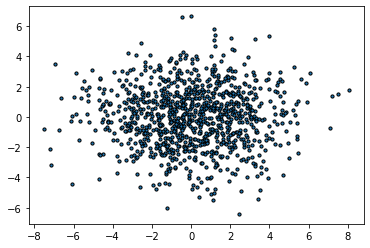

In [32]:
pca = PCA(n_components=5)
x_d = pca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

In [49]:
%timeit pca.fit_transform(X_std)

22.1 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


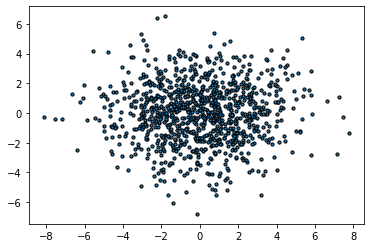

In [50]:
spca = SparsePCA(n_components=5)
x_d = spca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

In [51]:
%timeit spca.fit_transform(X_std)

248 ms ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Task 2: Implement you version of PCA (or SPCA) and using template above check it time performance

#### PCA

In [52]:
# YOUR IMPLEMENTATION OF PCA (FOR NOVICES)
"""
###Steps####
1. Subtract the mean of each variable
2. Compute the Eigenvalues and Eigenvectors using SVD
3. Sort Eigenvalues in descending order
4. Select a subset from the rearranged Eigenvalue matrix
5. Transform the data

"""
class myPCA():
    def __init__(self, n_components=None):
        # YOUR CODE HERE
        self.n_components = n_components
            
    def eigenvalue(self,A, v):
        val = np.dot(A,v)
        val/= v
        return val[0]
    
    def my_norm(self,A):
        norm = 0        
        [norm := norm + np.abs(i) ** 2 for i in A]
        norm = np.sqrt(norm)
        return norm
    
    def svd_eigen(self,A, epsilon=1e-10):
        """returns dominant eigenvalue and dominant eigenvector of matrix A"""
        n, m = A.shape
        k=min(n,m)
        v = np.ones(k) / np.sqrt(k)
        if n > m:
            A = np.dot(A.T,A)
        elif n < m:
            A = np.dot(A,A.T)

        ev = self.eigenvalue(A, v)

        while True:
            Av = np.dot(A,v)
            v_new = Av / self.my_norm(Av)
            ev_new = self.eigenvalue(A, v_new)
            if np.abs(ev - ev_new) < epsilon:
                break
            v = v_new
            ev = ev_new
        return v_new
    

    def svd(self, A, k=None, epsilon=1e-10):
        """returns k dominant eigenvalues and eigenvectors of matrix A"""
        A = np.array(A, dtype=float)
        n, m = A.shape

        svds = []
        if k is None:
            k =3

        for i in range(k):
            mat = A.copy()
            for sig_value, u, v in svds[:i]:
                mat -= sig_value * np.outer(u, v)
            if n > m:
                v = self.svd_eigen(mat, epsilon=epsilon) 
                u_unnormalized = np.dot(A,v)
                sigma = self.my_norm(u_unnormalized)  
                u = u_unnormalized / sigma
            else:
                u = self.svd_eigen(mat, epsilon=epsilon) 
                v_unnormalized = np.dot(A.T,u)
                sigma = self.my_norm(v_unnormalized) 
                v = v_unnormalized / sigma

            svds.append((sigma, u, v))

        singular_values, us, vs = [np.array(x) for x in zip(*svds)]
        return singular_values, us.T, vs
        
        
    def fit_transform(self, X, y=None):
        # YOUR CODE HERE
        #step1
        X_meaned = X- np.mean(X , axis = 0)
        
        #step2
        eig_values, eig_vectors, _ = self.svd(X.T)
        
        #step3
        sorted_index = np.argsort(eig_values)[::-1]
        sorted_eigvalues = eig_values[sorted_index]
        sorted_eigvectors = eig_vectors[:,sorted_index]
        
        #step4
        eigvector_subset = sorted_eigvectors[:,0:self.n_components]
        
        #step5
        X_reduced = np.dot(eigvector_subset.transpose() , X_meaned.transpose() ).transpose()
        
        #result
        return X_reduced

        
    

In [53]:
pca = myPCA(n_components=4)

In [55]:
# TEST TIME PERFORMANCE OF YOUR PCA
%timeit pca.fit_transform(X_std)

21.8 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


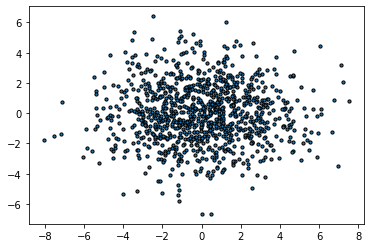

In [56]:
# DRAW RESULTS
x_d = pca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

#### SparcePCA (for champions)

In [ ]:
# YOUR IMPLEMENTATION OF SparcePCA (FOR CHAMPIONS)
class mySparcePCA():
    def __init__(self, n_components=None):
        # YOUR CODE HERE
    def fit_transform(self, X, y=None):
        # YOUR CODE HERE

In [ ]:
spca = mySparcePCA(n_components=???)

In [ ]:
# TEST TIME PERFORMANCE OF YOUR SPCA
%timeit spca.fit_transform(X_std)

In [ ]:
# DRAW RESULTS
x_d = spca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

## Case 3: Сreative task

I offer your to have a practive with your implementation on [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) Kaggle dataset. 

You need to identify the number of main components and make clustering using Kmeans.

- Preliminary preparation of the dataset: get rid of zero values, transform categorical features.

- Scale the dataset (use StandardScaler or anything you want).

- Identify the number of main components (demonstrate the analysis toolkit).

- Reduce the dimensionality of the space by using your PCA implementation (SPCA).

- Cluster the dataset by Kmeans algo.

In [59]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv("./tmdb_5000_movies.csv")

In [61]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [62]:
######Preliminary preparation of the dataset##########

In [63]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)

In [64]:
df_num = df[num_list]
df_num.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [65]:
df_num = df_num.fillna(value=0, axis=1)
df_num.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [69]:
###########Scale the dataset###########

In [70]:
X = df_num.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [71]:
#########Identify the number of main components#########

<AxesSubplot:title={'center':'Pearson Correlation of Movie Features'}>

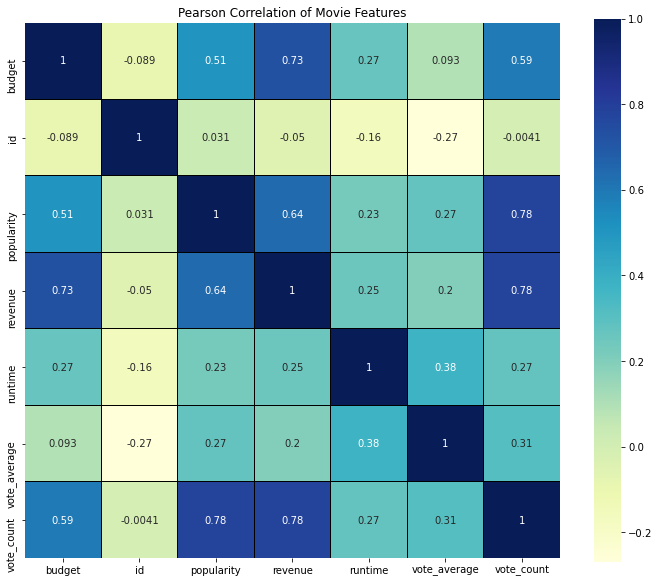

In [72]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [73]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals


array([3.27639513, 1.34750731, 0.83788985, 0.70982729, 0.41233718,
       0.15976325, 0.25773771])

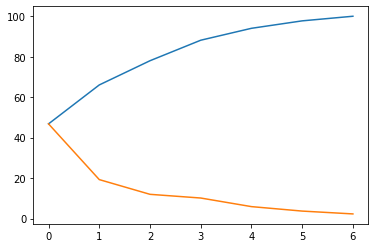

In [74]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.plot(cum_var_exp)
plt.plot(var_exp)

In [75]:
#########Reduce the dimensionality of the space by using your PCA#########

In [76]:
pca = myPCA(n_components=7)
x_7d = pca.fit_transform(X_std)

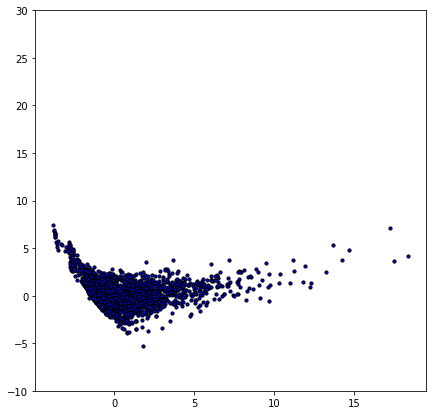

In [77]:
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,1], c='blue',s=10, edgecolor='k')
plt.ylim(-10,30)
plt.show()

In [78]:
#########Cluster the dataset by Kmeans algo#########
from sklearn.cluster import KMeans


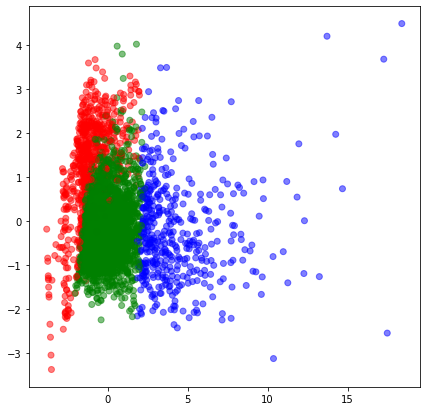

In [79]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color,alpha=0.5) 
plt.show()

C:\Users\hanan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


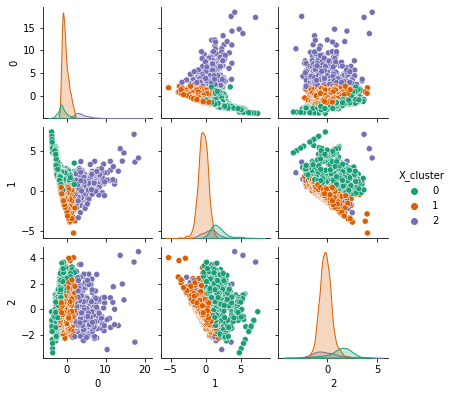

In [80]:
# Create a temp dataframe from our PCA projection data "x_7d"
df = pd.DataFrame(x_7d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)